<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Evaluation%20de%20la%20qualite%20des%20images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'évaluation de la qualité des images

Exécuter les 2 lignes suivantes pour colab.

In [8]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 416 (delta 54), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (416/416), 33.09 MiB | 3.49 MiB/s, done.
Resolving deltas: 100% (208/208), done.
/Users/bilgab/INF8770/INF8770


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

Lecture d'une image, et altération de celli-ci pour comparer PSNR et SSIM. 

In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[:,:], [0.299, 0.587, 0.114])

image = plt.imread('RGB.jpg')
image = rgb2gray(image)

bruit = (np.zeros_like(image) - 0.5 + np.random.random(size=image.shape)) *30
constante = np.ones_like(image) * 30

imagebruit = image + bruit  #Ajout d'un bruit aléatoire
imagebruit = np.clip(imagebruit,0,255).astype('uint8')
imageplusconstante = image + constante #Ajout d'une constante
imageimageplusconstante = np.clip(imageplusconstante,0,255).astype('uint8')
image = image.astype('uint8')

Application des mesures PSNR et SSIM. Affichage des résultats et des images associées.

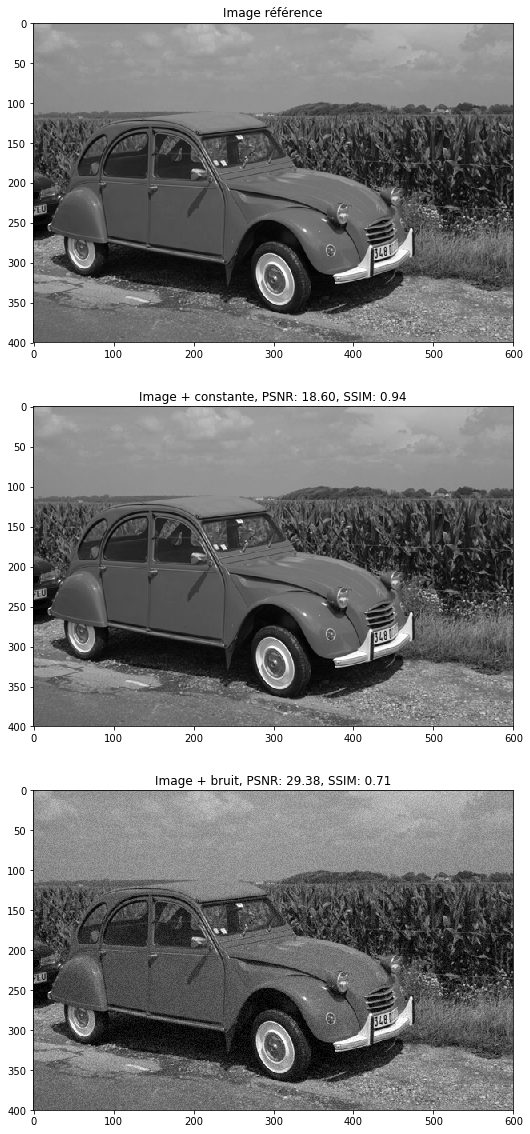

In [11]:
psnr1 = peak_signal_noise_ratio(image, imagebruit)
psnr2 = peak_signal_noise_ratio(image, imageimageplusconstante)
ssim1 = structural_similarity(image, imagebruit)
ssim2 = structural_similarity(image, imageimageplusconstante)

label = 'PSNR: {:.2f}, SSIM: {:.2f}'
f, axarr = plt.subplots(3, 1, figsize=(10,20))
axarr[0].imshow(image,cmap = plt.get_cmap('gray'))
axarr[0].set_title('Image référence')
axarr[1].imshow(imageplusconstante,cmap = plt.get_cmap('gray'))
axarr[1].set_title('Image + constante, '+ label.format(psnr2,ssim2))
axarr[2].imshow(imagebruit,cmap = plt.get_cmap('gray'))
axarr[2].set_title('Image + bruit, '+ label.format(psnr1,ssim1))

plt.show()

Noter que PSNR et SSIM ne sont pas en accord sur la qualité des images.